Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                  precision    recall  f1-score   support

     Status Gizi       0.00      0.00      0.00         1
          normal       0.96      0.97      0.97     20126
severely stunted       0.91      0.93      0.92      6057
         stunted       0.80      0.75      0.78      4164
          tinggi       0.97      0.95      0.96      5952

        accuracy                           0.94     36300
       macro avg       0.73      0.72      0.72     36300
    weighted avg       0.94      0.94      0.94     36300



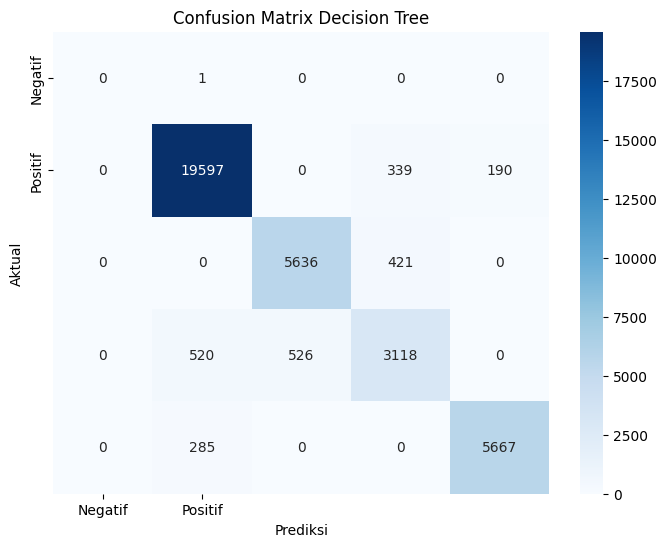

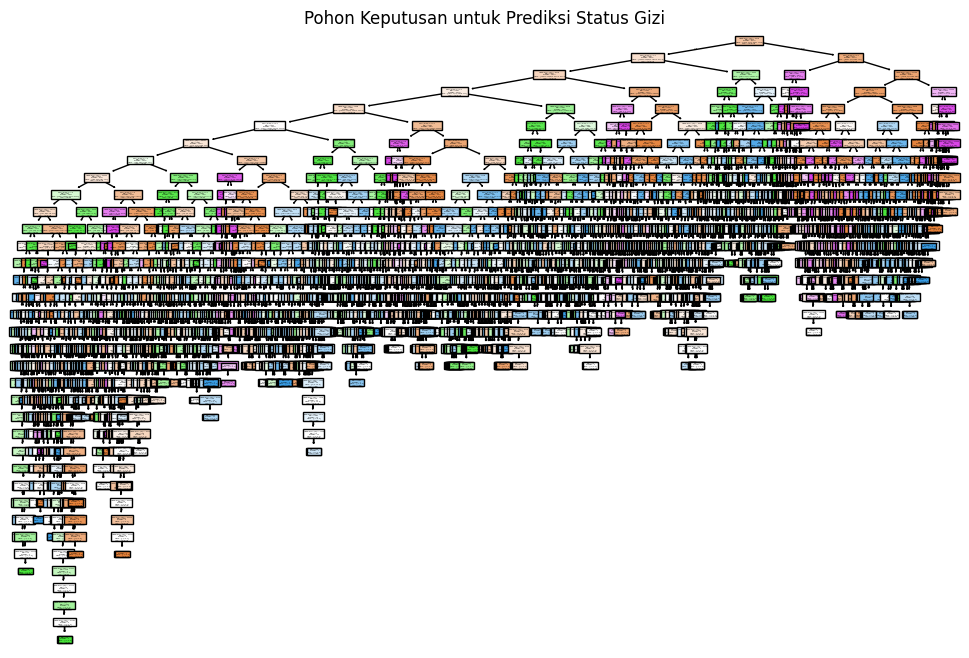

In [ ]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer

# Membaca data
columns = ["Umur (bulan)", "Jenis Kelamin", "Tinggi Badan (cm)", "Status Gizi"]
df = pd.read_csv(r'data_balita.csv', names=columns)

# Konversi kolom numerik dan tangani nilai NaN
for col in ["Umur (bulan)", "Tinggi Badan (cm)"]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Imputasi nilai NaN dengan mean
imputer = SimpleImputer(strategy='mean')
df[["Umur (bulan)", "Tinggi Badan (cm)"]] = imputer.fit_transform(df[["Umur (bulan)", "Tinggi Badan (cm)"]])

# Persiapan data untuk Decision Tree
X = df[["Umur (bulan)", "Tinggi Badan (cm)"]]  # Fitur
y = df["Status Gizi"]  # Target

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi dan pelatihan model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi data uji
y_pred = model.predict(X_test)

# Evaluasi model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Hitung Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix menggunakan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.title("Confusion Matrix Decision Tree")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# Visualisasi pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=["Umur (bulan)", "Tinggi Badan (cm)"], class_names=df["Status Gizi"].unique(), filled=True)
plt.title("Pohon Keputusan untuk Prediksi Status Gizi")
plt.show()
